# Bulding K means algorithm from scratch used to compress images

K means algorithm: Cluster unlabelled data points to K number of groups based on their  distance between each other. 

1. Randomly initialize K number of centroids. Best way to do this is to randomly choose K number of data points from X to ensure that at least 1 point will be assigned to every centroid.  
2. Group each data point to the closest centroid. 
3. For each group, calculate the mean position of all the points assigned and update the every centroid position with their respective mean value. 

Repeat step 2,3 for n number of times to minimize the cost function. 

**Cost function** The Euclidean distance (also known as the pythagoras distance) between data points and their assigned centroids. 

A few things to take note of: 
* Different inital centroids will give different results, this algorithm is prone to being stuck at a local minima and therefore trying reruning the algorithm a few times with different initial centroids is crutial at times. We choose the centroids that gives the lowest cost function. 

## Image data
We will work with coloured image for this example. First, it is important to understand how image data is represented and understood in code. 

Every image is made out of thousands of small squares each with a uniform colour, known as pixels. An image with a 120 x 120 pixel contains 14,400 squares, each square representing one colour. There are 2 main types of images, grayscale and colored images. 

1. Grayscale: Each pixel has a number from 0-255, representing the brightness of the color. black is represented by 0, white by 255 and different brightness of gray in between. 

2. Colored: Each pixel has 3 numbers, each ranging from 0-255, representing the color brightness in Red,Blue,Green scale. All the colors can be represented by a combination of the RGB color scale. With this we have a 3D matrix, m x n x z where m x n represent the number of pixels and z represents the RGB scale number. We can imagine 3 layers of 2D matrix stacked on top of each other, each layer representing the Red, Green and Blue scale.

Combination of different RGB brighteness can be visualized here: 


https://www.w3schools.com/colors/colors_rgb.asp?color=rgb(0,%20191,%20255)

## Image data and memory

For grayscale images, each pixel can have value from 0-255 which requires 8 bits of memory (log2(256)). For a 120x120 image, it takes 115,200 bits. 

For colored images, each pixel can hava 0-255 values for each color scale, so the memory required for each pixel is 8 bits times 3, 24 bits. For a 120x 120 image that is 345,500 bits. 



In [1]:
import numpy as np

## Randomly initializing the first values of centroids
We want K number of centroids chosen randomly to use as a starting point (initial guess) for the algorithm to iterate on and optimize the values. 

np.random.permutation(n) produces an array with n number of elements with values (1 to n, int) that are randomly arranged. 

In [2]:
def centroid_initialization(X,K):
    random_index=np.random.permutation(X.shape[0])
    centroids=X[random_index[0:K],:]
    return centroids

In [3]:
def closestCentroids(centroids,X):
    idx=np.zeros((X.shape[0],1),dtype=int) #Int type for indexing later
    for i in range(0,X.shape[0]):
        error=np.zeros(centroids.shape[0])
        for j in range(0,centroids.shape[0]):
            error[j]=np.sqrt(np.sum((X[i,:]-centroids[j,:])**2))
        index=np.argmin(error)
        idx[i]=index
    return idx

In [4]:
def computeCentroids(X,idx,K):
    centroids=np.zeros((K,X.shape[1]))
    for i in range(0,K):
        sum=np.zeros((1,X.shape[1]))
        count=0
        for j in range(0,X.shape[0]):
            if i==idx[j]:
                sum+=X[j,:]
                count+=1
        centroids[i,:]=np.divide(sum,count);
    return centroids 


In [9]:
def runKMeans(X,K,max_iter):
    centroids=centroid_initialization(X,K)
    for iter in range(0,max_iter):
        dist=0
        print(f'K Means iteration {iter}/{max_iter}')
        idx=closestCentroids(centroids,X)
        centroids=computeCentroids(X,idx,K)
    return centroids,idx

In [6]:
import matplotlib.pyplot as plt

In [7]:
A=plt.imread('imag4.jpg')
A=A/255
X=np.reshape(A,(A.shape[0]*A.shape[1],A.shape[2]))

In [10]:
K=7;
max_iter=5;
centroids,idx=runKMeans(X,K,max_iter);

K Means iteration 0/5
K Means iteration 1/5
K Means iteration 2/5
K Means iteration 3/5
K Means iteration 4/5


In [11]:
X_recovered=centroids[idx,:];
X_recovered=np.reshape(X_recovered,(A.shape));
print(X_recovered.shape)

(226, 228, 3)


Text(0.5, 1.0, 'Original image')

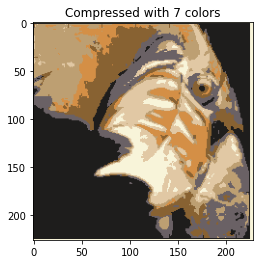

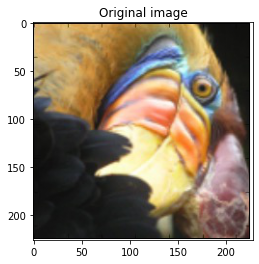

In [12]:
plt.figure()
plt.imshow(A)
plt.title('Original image')
plt.figure()
plt.imshow(X_recovered);
plt.title(f'Compressed with {K} colors');

Dtype: <class 'numpy.ndarray'>, Image shape: (107, 263, 3), minimum entry: 0, Maximum entry: 255


(28141, 3)

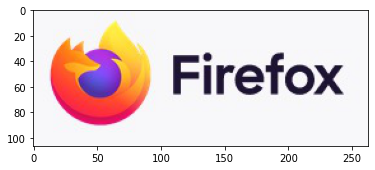

In [13]:
A=plt.imread('image3.jpg');
plt.imshow(A)
print(f'Dtype: {type(A)}, Image shape: {A.shape}, minimum entry: {A.min()}, Maximum entry: {A.max()}')
A=np.divide(A,255)
X=np.reshape(A,(A.shape[0]*A.shape[1],3))
X.shape

In [20]:
max_iter=5;
K=5;
centroids1,idx1=runKMeans(X,K,max_iter);

K Means iteration 0/5


/var/folders/qj/5ssxjm8s2s731znyfr8x_hy00000gn/T/ipykernel_2550/1674743059.py:10: RuntimeWarning: invalid value encountered in true_divide
  centroids[i,:]=np.divide(sum,count);


K Means iteration 1/5
K Means iteration 2/5
K Means iteration 3/5
K Means iteration 4/5


In [21]:
X_recovered=centroids[idx1,:];
X_recovered=np.reshape(X_recovered,(A.shape));
print(X_recovered.shape)

(107, 263, 3)


6 0
(107, 263, 3)


Text(0.5, 1.0, 'Compressed with 5 colors')

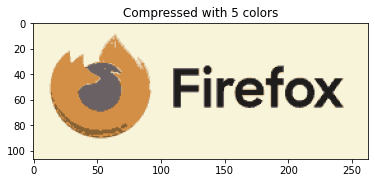

In [22]:
idx=closestCentroids(centroids,X).astype(int);
print(idx.max(), idx.min())
X_recovered=centroids[idx,:];
X_recovered=np.reshape(X_recovered,(A.shape));

Text(0.5, 1.0, 'Original')

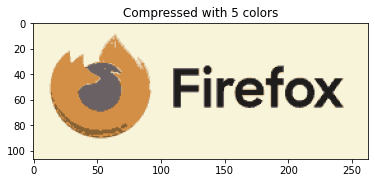

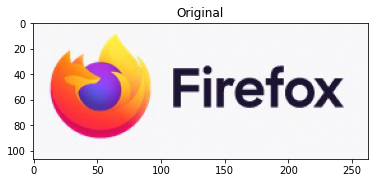

In [23]:
plt.figure;
plt.imshow(X_recovered);
plt.title(f'Compressed with {K} colors');
plt.figure()
plt.imshow(A)
plt.title('Original')